# 問題例

## 問題例の作成

In [350]:
def example():
    """
    inputs :
        None
    outputs :
        service_period : 全体の勤務時間
        customers : 顧客を表す辞書．　{顧客を表す数字 : (需要が発生する時刻, 需要量, ピックアップ地点を表す座標, デリバリー地点を表す座標, 時間枠, 時間枠の逸脱費用}
        vehicles : 配送車を表す辞書．　{配送車を表す数字 : (容量)}
    parameters :
        n : 顧客の数
        r : 顧客の座標の範囲
        d_time : 需要が発生する時刻
        lower_dem : 需要量の最小値
        upper_dem : 需要量の最大値
        demand : 需要量
        tw : 顧客の時間枠
        penalty : 時間枠の逸脱費用
        n_vehicles : 配送車の数
        lower_cap : 配送車の容量の最小値
        capacity : 配送車の容量
    """
    import random
    random.seed(0)
    service_period = 30
    n = 3
    r = 10.0
    lower_dem = 1
    upper_dem = 10
    customers = {}
    demands = 0
    for i in range(n):
        d_time = random.randint(0, int(service_period*0.7))
        demand = random.uniform(lower_dem, upper_dem)
        p_x = random.uniform(-r, r)
        p_y = random.uniform(-r, r)
        d_x = random.uniform(-r, r)
        d_y = random.uniform(-r, r)
        s = random.uniform(0, service_period)
        t = random.uniform(s, service_period)
        tw = (s,t)
        penalty = 0.1
        customers[i] = (d_time, demand, (p_x, p_y), (d_x, d_y), tw, penalty)
        demands += demand
    n_vehicles = random.randint(1, n)
    lower_cap = demands/2
    upper_cap = demands
    vehicles = {}
    for v in range(n_vehicles):
        capacity = random.uniform(lower_cap, upper_cap)
        #upper_cap = demands - capacity
        vehicles[v] = capacity
    return service_period, customers, vehicles

In [351]:
service_period, customers, vehicles = example()
print("全体の時間 : ", service_period, "分")
print("顧客 : ")
for key, values in customers.items():
    print(key)
    for value in values:
        print("\t", value)
print("車両 : ")
for key, values in vehicles.items():
    print(key, "\t", values)

全体の時間 :  30 分
顧客 : 
0
	 12
	 7.821589626462722
	 (-1.5885683833831, -4.821664994140733)
	 (0.22549442737217085, -1.9013172509917133)
	 (23.51395767104318, 25.481256851302387)
	 0.1
1
	 15
	 4.222444372254895
	 (7.833213196413649, -5.6311454616953664)
	 (-7.214525896036948, -7.205084300666423)
	 (2.844922904305678, 24.552761433972293)
	 0.1
2
	 17
	 9.845069284338878
	 (6.20434471993179, 8.043319008791656)
	 (-3.797048613613347, 4.596634965202572)
	 (26.965148639039803, 29.04093820568829)
	 0.1
車両 : 
0 	 17.07146136114074
1 	 14.816639117776514


In [352]:
#顧客の需要の合計 < 配送車の容量の合計　となっているかチェック
sum(map(lambda x : x[1], customers.values())) < sum(vehicles.values())

True

## 問題例の描画

あるリクエストに対し，●がピックアップ地点，▲がデリバリー地点


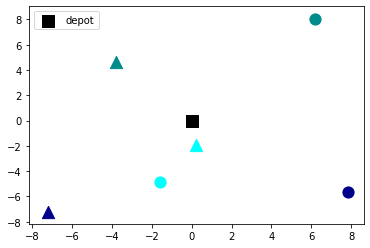

In [353]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#x = list(map(lambda x: x[0], customers.values()))
#y = list(map(lambda x: x[1], customers.values()))
d_time, demand, p, d, tw, penalty = zip(*customers.values())
p_xs, p_ys = zip(*p)
d_xs, d_ys = zip(*d)

colors =  list(matplotlib.colors.cnames.keys())
plt.scatter(0, 0, marker=",", color="black", s=150, label="depot")

for i in range(len(customers)):
    color = colors[i+20]
    p_x, p_y, d_x, d_y = p_xs[i], p_ys[i], d_xs[i], d_ys[i]
    #ピックアップ地点
    plt.scatter(p_x, p_y, marker=".", color=color, s=500)
    #デリバリー地点
    plt.scatter(d_x, d_y, marker="^", color=color, s=150)

print("あるリクエストに対し，●がピックアップ地点，▲がデリバリー地点")
plt.legend()
plt.show()

# Constructive method

- Constructive methodでは，i分ごとにSimple insertion methodを行う．
- Simple insertion methodでは，tourにリクエストを挿入するのにかかるコストを元に，現在のtourにリクエストを挿入する．

- customerを需要が発生する時刻の早い順に並べ替え，キューにいれる．
- sloveの中で，time%i==0となるごとにconstructive(self, 新しい需要)として挿入を行う．

In [453]:
class instance():
    def __init__(self):
        self.n_customer = len(customers)
        self.tour = []
        self.objval = 0
    def set_instance(self, service_period, customers, vehicles):
        self.service_period = service_period
        self.customers = customers
        self.vehicles = vehicles
        self.tour = []
    def solve(self):
        """
        i分ごとにSimple insertion methodを行う．
        inputs :
        outputs :
            None
        parameters :
            i : Simple insertion methodを行う時間間隔
        """
        # 需要が発生する時刻が早い順に並べ替える
        sorted_cs = sorted(self.customers, key=lambda x : self.customers[x][0])
        """
        print("需要が発生する時刻が早い順に並べた顧客 : ", sorted_cs)
        print("顧客の需要が発生する時刻 : ", [self.customers[c][0] for c in sorted_cs])
        """
        # i分ごとにconstructiveを実行
        i = 5
        
        time = sorted(set(range(0, self.service_period, i))|{self.service_period})
        print("time : ", time)
        now = -1
        while (sorted_cs != []) and (len(sorted_cs) != 1):
            now += 1
            print("now : ", now)
            # 前回挿入を行った時から現在までの間に溜まったリクエスト
            new_reqs = []
            for idx,req in enumerate(sorted_cs):
                print("顧客の需要が発生する時刻は，", self.customers[req][0])
                if self.customers[req][0] <= time[now]:
                    new_reqs.append(self.customers[req])
                    if idx == len(sorted_cs)-1:
                        sorted_cs = []
                else:
                    sorted_cs = sorted_cs[idx:]
                    break
            # constructiveの実行
            self.constructive(new_reqs)
            #print(self.tour)
            print("time : ", time[now], "\t new_reqs : ", new_reqs)
            print("sorted_cs : ", sorted_cs)
            print()
        """for time in sorted(set(range(0, self.service_period, i))|{self.service_period}):
            # 前回挿入を行った時から現在までの間に溜まったリクエスト
            new_reqs = []
            if sorted_cs != []:
                for idx,req in enumerate(sorted_cs):
                    ##print("顧客の需要が発生する時刻は，", self.customers[req][0], "\t 現在時刻は", time)
                    if self.customers[req][0] <= time:
                        new_reqs.append(self.customers[req])
                    else:                    
                        sorted_cs = sorted_cs[idx:]
                        break
                    if len(sorted_cs) == 1:
                        sorted_cs = []
                ##print("time : ", time, "\t new_reqs : ", new_reqs)
                ##print("sorted_cs : ", sorted_cs)
                ##print()
            else:
                break
            # constructiveの実行
            self.constructive(new_reqs)
            #print(self.tour)"""
    def constructive(self, new_reqs):
        """
        Simple insertion methos
        inputs :
        outputs :
        """
        # tourを前から順番に見ていって最も挿入するコストがかからないところにリクエストを挿入
        #for t in tour:

In [454]:
instance = instance()
instance.set_instance(service_period, customers, vehicles)
print(instance.service_period)

30


In [455]:
instance.solve()

time :  [0, 5, 10, 15, 20, 25, 30]
now :  0
顧客の需要が発生する時刻は， 12
time :  0 	 new_reqs :  []
sorted_cs :  [0, 1, 2]

now :  1
顧客の需要が発生する時刻は， 12
time :  5 	 new_reqs :  []
sorted_cs :  [0, 1, 2]

now :  2
顧客の需要が発生する時刻は， 12
time :  10 	 new_reqs :  []
sorted_cs :  [0, 1, 2]

now :  3
顧客の需要が発生する時刻は， 12
顧客の需要が発生する時刻は， 15
顧客の需要が発生する時刻は， 17
time :  15 	 new_reqs :  [(12, 7.821589626462722, (-1.5885683833831, -4.821664994140733), (0.22549442737217085, -1.9013172509917133), (23.51395767104318, 25.481256851302387), 0.1), (15, 4.222444372254895, (7.833213196413649, -5.6311454616953664), (-7.214525896036948, -7.205084300666423), (2.844922904305678, 24.552761433972293), 0.1)]
sorted_cs :  [2]

